In [7]:
import pandas as pd

In [6]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression AUC-ROC: 0.861504601115861
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

[[934 102]
 [156 217]]
Random Forest AUC-ROC: 0.8297470680178454
              precision    recall  f1-score   support

           0       0.83      0.91      0.86      1036
           1       0.64      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409

[[939  97]
 [198 175]]
Model chosen for further analysis: Logistic Regression


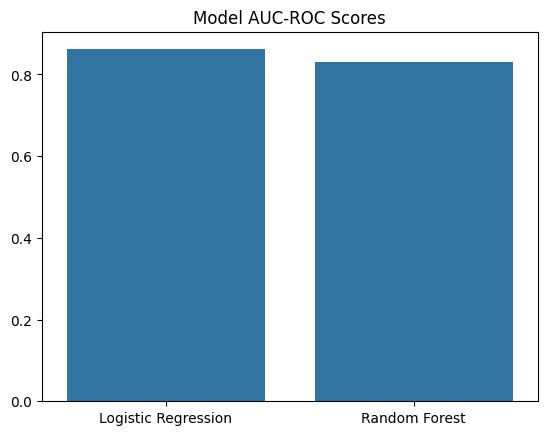

In [5]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# Step 2: Load the Dataset
df = pd.read_csv('Telco-Customer-Churn.csv')

# Step 3: Pre-process the Data
# Convert TotalCharges to numeric and handle nulls
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
imputer = SimpleImputer(strategy='median')
df['TotalCharges'] = imputer.fit_transform(df[['TotalCharges']])

# Encode categorical variables
label_cols = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in label_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Step 4: Feature Selection
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Model Training and Evaluation
models = {'Logistic Regression': LogisticRegression(max_iter=1000), 'Random Forest': RandomForestClassifier()}
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, preds)
    results[name] = auc_score
    print(f'{name} AUC-ROC: {auc_score}')
    # Output more metrics
    print(classification_report(y_test, model.predict(X_test)))
    print(confusion_matrix(y_test, model.predict(X_test)))
    
# Step 7: Generate insights based on the model with a high AUC-ROC score
chosen_model = max(results, key=results.get)
print(f"Model chosen for further analysis: {chosen_model}")

# Step 8: Visualizations
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('Model AUC-ROC Scores')
plt.show()

# Show feature importance if applicable
if chosen_model == 'Random Forest':
    feature_importances = models[chosen_model].feature_importances_
    sns.barplot(x=feature_importances, y=X.columns)
    plt.title('Feature Importances')
    plt.show()